In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
from pydataset import data

In [3]:
iris = data('iris')

In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]

In [7]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Prop  I need the labels now, I lost 'em

In [8]:
oops = iris.drop(columns='species')

In [9]:
oops.head()

,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


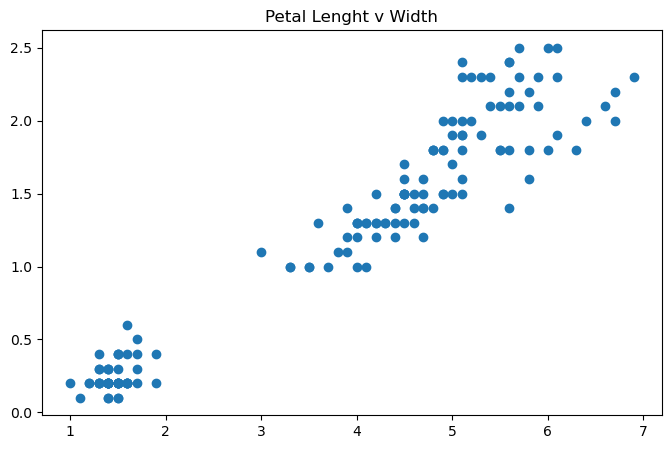

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(oops.petal_length, oops.petal_width)
plt.title('Petal Length v Width')
plt.show()

In [22]:
# model
# first scale data, then feed scaled data into kmeans

feats_to_scale = ['petal_length','petal_width']
cols_scaled = [col+'scaled' for col in feats_to_scale]

oops[cols_scaled] = MinMaxScaler().fit_transform(oops[feats_to_scale])

In [23]:
oops.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_lengthscaled,petal_widthscaled
1,5.1,3.5,1.4,0.2,0.067797,0.041667
2,4.9,3.0,1.4,0.2,0.067797,0.041667
3,4.7,3.2,1.3,0.2,0.050847,0.041667
4,4.6,3.1,1.5,0.2,0.084746,0.041667
5,5.0,3.6,1.4,0.2,0.067797,0.041667


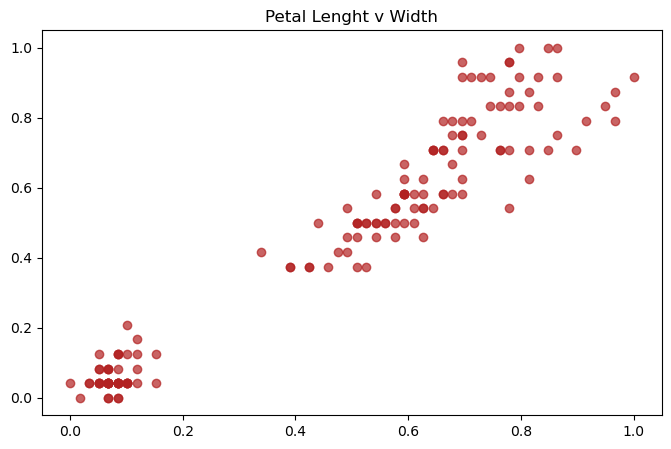

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(oops.petal_lengthscaled, oops.petal_widthscaled,c='firebrick',alpha=0.7)
plt.title('Petal Lenght v Width')
plt.show()

In [28]:
k_means_proto = KMeans(n_clusters=3)
k_means_proto.fit(oops[cols_scaled])
clusters = k_means_proto.predict(oops[cols_scaled])

In [29]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [30]:
oops['cluster_assigned'] = clusters

In [31]:
oops.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_lengthscaled,petal_widthscaled,cluster_assigned
1,5.1,3.5,1.4,0.2,0.067797,0.041667,1
2,4.9,3.0,1.4,0.2,0.067797,0.041667,1
3,4.7,3.2,1.3,0.2,0.050847,0.041667,1
4,4.6,3.1,1.5,0.2,0.084746,0.041667,1
5,5.0,3.6,1.4,0.2,0.067797,0.041667,1


In [32]:
oops.cluster_assigned.value_counts()

0    52
1    50
2    48
Name: cluster_assigned, dtype: int64

In [33]:
oops.cluster_assigned.unique()

array([1, 0, 2], dtype=int32)

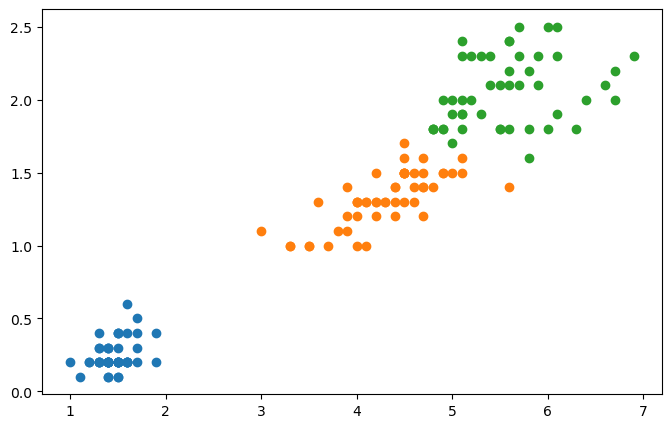

In [38]:
plt.figure(figsize=(8,5))
for cluster in oops.cluster_assigned.unique():
    plt.scatter(oops[oops.cluster_assigned == cluster].petal_length,
            oops[oops.cluster_assigned == cluster].petal_width)
plt.show()

In [39]:
oops['species'] = iris.species

In [44]:
for thing in oops.groupby('species'):
    print(thing[1])

    sepal_length  sepal_width  ...  cluster_assigned  species
1            5.1          3.5  ...                 1   setosa
2            4.9          3.0  ...                 1   setosa
3            4.7          3.2  ...                 1   setosa
4            4.6          3.1  ...                 1   setosa
5            5.0          3.6  ...                 1   setosa
6            5.4          3.9  ...                 1   setosa
7            4.6          3.4  ...                 1   setosa
8            5.0          3.4  ...                 1   setosa
9            4.4          2.9  ...                 1   setosa
10           4.9          3.1  ...                 1   setosa
11           5.4          3.7  ...                 1   setosa
12           4.8          3.4  ...                 1   setosa
13           4.8          3.0  ...                 1   setosa
14           4.3          3.0  ...                 1   setosa
15           5.8          4.0  ...                 1   setosa
16      

In [45]:
k_means_proto.inertia_

1.7018746881920968

In [46]:
#dictionary Comp
{k: KMeans(k).fit(oops[cols_scaled]).inertia_ for k in range (2,25)}

{2: 5.176463590044368,
 3: 1.7018746881920968,
 4: 1.1588792731667126,
 5: 0.8616150173815892,
 6: 0.6801035704886195,
 7: 0.5656776810037092,
 8: 0.485808455391437,
 9: 0.4254419833522953,
 10: 0.364881039066573,
 11: 0.33824001805001724,
 12: 0.30718218050055407,
 13: 0.26846168560482275,
 14: 0.25261569376160176,
 15: 0.2351993048478209,
 16: 0.21490716171898389,
 17: 0.19385235679501756,
 18: 0.1845339652534439,
 19: 0.17073624672947338,
 20: 0.1578303080946898,
 21: 0.14840721109416355,
 22: 0.13961708638044987,
 23: 0.13402246593140016,
 24: 0.12100883479868217}

In [47]:
kmeans_dict = {k: KMeans(k).fit(oops[cols_scaled]).inertia_ for k in range (2,25)}

In [64]:
kmeans_dict

{2: 5.176463590044368,
 3: 1.7018746881920968,
 4: 1.1588792731667126,
 5: 0.8538617353912239,
 6: 0.6795297632254397,
 7: 0.566867830638765,
 8: 0.4931360038635195,
 9: 0.41335075742016236,
 10: 0.3640613689743311,
 11: 0.335563230399491,
 12: 0.296962841389772,
 13: 0.279279155806027,
 14: 0.24623126648171084,
 15: 0.23008949059868072,
 16: 0.21830153362334492,
 17: 0.19426623020124514,
 18: 0.18597617614445572,
 19: 0.16794699190921542,
 20: 0.16205301423926238,
 21: 0.14890937366499957,
 22: 0.14252116511651908,
 23: 0.1333027008654523,
 24: 0.13042012866869385}

<AxesSubplot:>

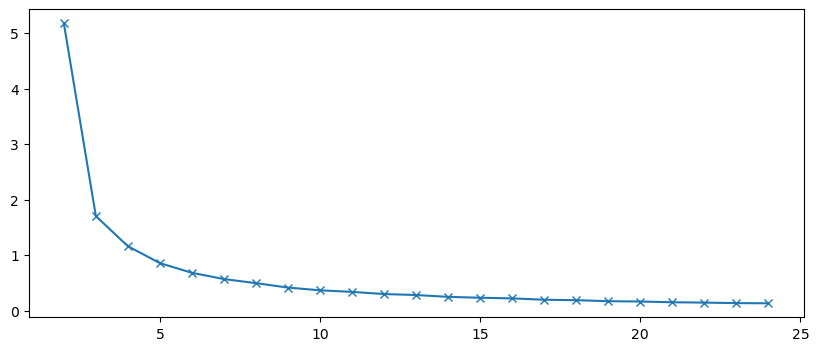

In [63]:
plt.figure(figsize=(10,4))
pd.Series(kmeans_dict).plot(marker='x')